# BUSINESS METRICS

In most, if not all, instituitions, management keeps track of the overall health of the business through the result of measurements called "metrics". Metrics are observed across time and calculated seperately at specific points in time, but are understood in a chronological context. A familiar example of a metric is revenue. In retail, a very popular metric is the average order value, and in subscription-based products, churn rate is crucial. 

This project aims at illustrating what makes a good metric by exploring some metrics in different scenerios. The context of this project resolved around business metrics, however, metrics are also important in other contexts. For instance, metrics that are followed by governments are as such: GDP, inflation and unemployment rate.

## #1 Net Promoter Score (NPS) metric

NPS is a customer success metric that quantifies customer satisfaction. You may have been familiar with this in some variations of surveys, where you are asked to rate on a scale from 0 till 10 on some particular matter. 
Those customers who pick:
- Anything from 0 to 6 are called detractors. These cuustomers share their negative experience with the product/company that they may spread negative feedback.
- 7 to 8: passives. Customers are pleased with the product/company but they are not actively promoting it and quickly turn to competition if a better opportunity presents itself. 
- 9 and 10: promoters. Extremely satisfied customers who will act as brand ambassadors. 

The equation for NPS is calculated as following:
NPS = Percentages of promoters - Percentage of detractors.
Note that NPS can range between -100% (everyone is a detractor) and 100% (everyone is a promoter). 

Next, we will compute NPS using a dataset specfically created for this mission. It has 3 columns:
- event_date: The date and time in which customers completed the survey.
- user_id: A customer identifier.
- score: Their answer to the question featured above.

We 'll track the NPS month by month.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("nps.csv", parse_dates=["event_date"])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [53]:
# create a numeric column in df called "yearmonth" that stores the year and the month of each row in the yyyymm format
year = df["event_date"].dt.year
month = df["event_date"].dt.month

df["yearmonth"] = year*100 + month

# create a column in df called "category" that assigns the category corresponding to its score to each row
def categorize(score):
    if score in range (0,7):
        return "Detractor"
    elif score in (7,8):
        return "Passive"
    elif score in (9,10):
        return "Promoter"
    return None

df["category"] =df["score"].apply(categorize)

# creare a new dataframe with NPS for each month 
nps = df.pivot_table(index="yearmonth", columns="category", aggfunc="size") #yearmonth as index, category as column and the string size as an aggregating function

# create a new column in nps named "total_responses" whose values are the sum of values of each row to get the total number of responses for the month
nps["total_responses"] = nps.sum(axis="columns")

# create a new column called nps in nps dataframe that estimates the NPS of each month
nps["nps"] = (nps["Promoter"] - nps["Detractor"])/nps["total_responses"]

#convert to percentage and as integer type
nps["nps"] = (nps["nps"]*100).astype(int)
nps

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51
202006,32,80,215,327,55
202007,48,95,258,401,52
202008,40,103,256,399,54
202009,18,68,135,221,52


Now when we are done with calculation, it is typical to visualize it with whatever software or tools you want. Let's create graph with Python!

Text(0.5, 0, '')

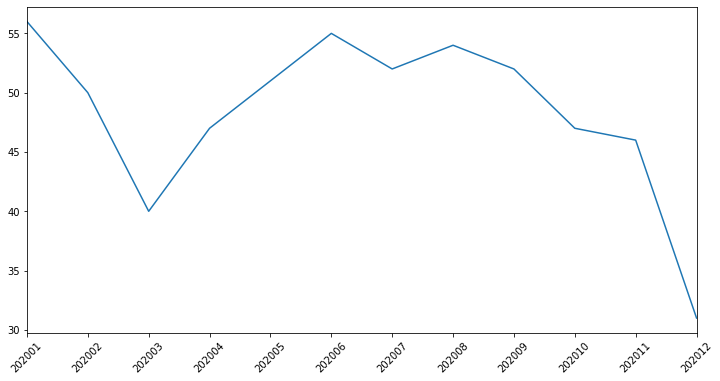

In [54]:
ax = nps.reset_index().plot(kind="line", x="yearmonth", y="nps", figsize=(12,6), legend=False)
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

As can been from the graph above, suppose it is December 2020, the NPS is just above 30. We can immediately tell that it is doing quite bad, at least compared to past few months in 2020. This is where teh actinaoble characteristics comes in. 

If we want to improve NPS, we must improve customer satisfaction. The company can start conducting surveys and gain some understandings as to what's driving this insatisfaction. In fact, it's a standard practice to leave a freedom text box where customers can share their feedback. Once we have this feedback, we can act upon to see how it impacts our NPS and as a result, we can improve the NPS metric.

Every metric has its pros and cons. Cons of NPS include:
- Require feedback from customers for it to be actionable ( while most customers don't give feedback)
- Do not account for the influence of each respondent, or the influence of each category of respondents. For instance, unsatisfied customers are prone to give feedback than promoters. 

Additionally, the NPS in December is low, but is it actually low? it could be attributed to the fact that the other months were high. Gauging how good an NPS is requires taking into account other factors, such as geographic location and industry. Hence, in order to gain insights into how a NPS fares, we must take these factors into account. 


Let's jump to another metric!


## #2 Customer churn metric

When a customer ceases to be a customer, we simply put that the customer has churned. 

Churn rate is the percentage of customers that churned in a given time period: Churn rate = Churned customers/Total customers. 

Here is the scenario: You purchased your local gym from its previous owner. It was a great deal as their mismanagement led the owners to decide that the business was not profitable, you as a customer and entrepreneur were able to see the unfulfilled potential. In 2013, Jan, the transaction was complete and you took the New Year as a fresh start to make a promo where people could sign up for 500 dollars/year instead of 50 dollars/month. You also renamed the gym to "Muscle Labs". You decided to use the traditional subscription model used in gyms where customers pay an installment per month to access the gym. A customer churns when they elect not to pay the installment - this makes our life easier to implement the concept for churn. 

The dataset we are going to use contains these columns:
- id: subscription ID, a customer can appear multiple times in this dataset by having multiple subscriptions instead if a continuous one. 
- customer_id: a customer identifier
- end_date: the actual (if in the past) and the estimated (if in the future) end date of the subscription. 
- start_date: when the subscription starts
- subscription_period: monthly or anually
- price: The price

From the dataset. now is December 2014, and you want to track the monthly churn rate from beofre you owned the the gym up to last month (November 2014).

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

subs = pd.read_csv("muscle_labs.csv", parse_dates=["end_date", "start_date"])
subs

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500
...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50


In [56]:
# create an integer column named churn_month that is the end_date column in yyyymm format
year = subs["end_date"].dt.year
month = subs["end_date"].dt.month

subs["churn_month"] = 100*year + month

# find the number of churned customers per month by creating a dataframe called "monthly_churn"
monthly_churn = pd.DataFrame({"total_churned":subs.groupby("churn_month").size()})
monthly_churn

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37
201108,40
201109,39
201110,47
201111,45


Alright, let's see when the start_date column starts with what value

In [57]:
print(subs["start_date"].min())

2011-01-05 13:55:00


From the monthly_churn dataframe, which starts from March of 2011, we can conlcude that at least 2 months were missing (Jan and Feb of 2011). Let's then create a dataframe with a column that accounts for all the relevant months!

In [58]:
years = list(range(2011, 2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


Since we are in the beginning of December of 2014, we stil don't have all the data for the curent month, we'll then delete the last entry when creating our dataframe.

In [59]:
yearmonths = yearmonths[:-1]
churn = pd.DataFrame({"yearmonth": yearmonths})
churn

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105
5,201106
6,201107
7,201108
8,201109
9,201110


Now let's populate this dataframe with the data in monthly_churn. 

In [60]:
churn = pd.merge(churn, monthly_churn, "left", left_on="yearmonth", right_index = True)
churn.head()

,yearmonth,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


Ouchh we have some null values right there. We will try to fill these spots with 0 and format the total_churned into integer type then.

In [61]:
churn.fillna(0, inplace=True)
churn["total_churned"] =churn["total_churned"].astype(int)
churn

,yearmonth,total_churned
0,201101,0
1,201102,0
2,201103,8
3,201104,16
4,201105,29
5,201106,27
6,201107,37
7,201108,40
8,201109,39
9,201110,47


When it comes to calculate the churn rate, we have total number of churned customers but we get stuck by definition of "total customers". What are really they? Here are few possible options:
- The number of customers at the beginning of the time period
- The mean between the number of customers at the beginning of the time period and at the end of the same period
- The average thoughout the time period - for instance, if the chosen time frame is a week, sum the number of customers from Monday though Sunday and divide by seven. 

Each option has its own pros and cons and which option to use depends on the details of the product and the business. Hence, it's better to use any reasonable definition than be stuck on choosing the absolute best one and not move on with getting this metric. In this case, we will choose the 1st option since it is easy to understand and it's eaasy to drill down into. 

In [62]:
# create a function that takes as input: an integer representing a month in the format yyyymm 
# and returns the number of rows in subs satisfying all conditions:
# start_date < 1st day of given month and 1st day of given month <= end_date
def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

churn["total_customers"] = churn["yearmonth"].apply(get_customers)
churn.head()

,yearmonth,total_churned,total_customers
0,201101,0,0
1,201102,0,17
2,201103,8,47
3,201104,16,82
4,201105,29,105


In [95]:
churn["churn_rate"] = churn["total_churned"] / churn["total_customers"]
churn["yearmonth"] = churn["yearmonth"].astype(str)
churn.fillna(0, inplace=True)
churn.head()

,yearmonth,total_churned_x,total_customers,churn_rate,total_churned_y,total_churned
0,201101,0,0,0.000000,0.0,0.0
1,201102,0,17,0.000000,0.0,0.0
2,201103,8,47,0.170213,8.0,8.0
3,201104,16,82,0.195122,16.0,16.0
4,201105,29,105,0.276190,29.0,29.0


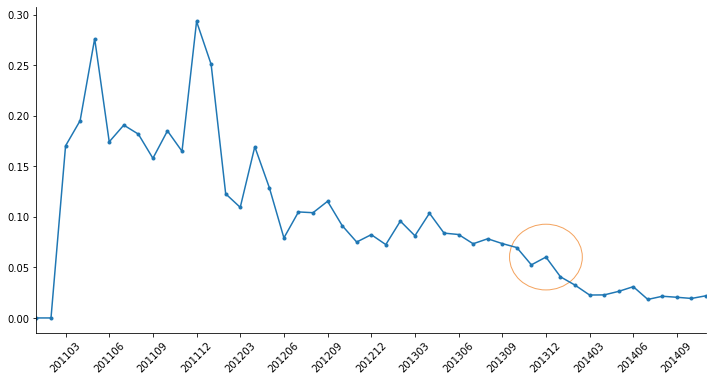

In [96]:
#plot the churn rate across time
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),5, 0.065, color='sandybrown', fill=False)
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

We have noticed few things from the graph generated above:
- The churn rate was very erratic from the beginning.
- In the months prior to you taking over the business in Jan of 2013, the churn rate started to become stable.
- After you took over the business, the churn rate rose a bit for 6 months. This is not suprising for a business to be re-imaged. 
- At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate. 

It had been almost since you took over the business, so you naturally decided to investigate what could have led to this spike. 

Based on your intuition, you were thinking it could be due to monthly and annually purchases. You decided to repeat the process for each segment: monthly subscription and annual subscription to see if this is the case. 

In [105]:
monthly_subs = subs[subs["subscription_period"]=="monthly"].copy()

year = monthly_subs["end_date"].dt.year
month = monthly_subs["end_date"].dt.month
monthly_subs["churn_month"] = 100*year + month
monthly_churned = pd.DataFrame({"total_churned":monthly_subs.groupby("churn_month").size()})

churn_by_month = pd.DataFrame({"yearmonth": yearmonths})
churn_by_month = pd.merge(churn_by_month, monthly_churned, "left", left_on="yearmonth", right_index = True)
churn_by_month.fillna(0, inplace=True)
churn_by_month["total_churned"] = churn_by_month["total_churned"].astype(int)

churn_by_month["total_customers"] = churn_by_month["yearmonth"].apply(get_customers)
churn_by_month["churn_rate"] = churn_by_month["total_churned"] / churn_by_month["total_customers"]
churn_by_month["yearmonth"] = churn_by_month["yearmonth"].astype(str)
churn_by_month.fillna(0, inplace=True)
churn_by_month.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,0.000000
1,201102,0,17,0.000000
2,201103,8,47,0.170213
3,201104,16,82,0.195122
4,201105,29,105,0.276190


Text(0.5, 1.0, 'Monthly subscription')

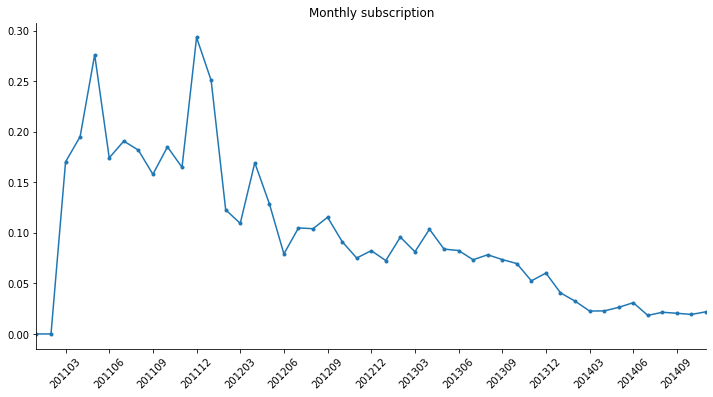

In [112]:
arange = __import__("numpy").arange
ax = churn_by_month.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()
ax.set_title("Monthly subscription")

In [99]:
annual_subs = subs[subs["subscription_period"]=="annual"].copy()

year = annual_subs["end_date"].dt.year
month = annual_subs["end_date"].dt.month
annual_subs["churn_month"] = 100*year + month
annual_churned = pd.DataFrame({"total_churned":annual_subs.groupby("churn_month").size()})

churn_by_year = pd.DataFrame({"yearmonth": yearmonths})
churn_by_year = pd.merge(churn_by_year, annual_churned, "left", left_on="yearmonth", right_index = True)
churn_by_year.fillna(0, inplace=True)
churn_by_year["total_churned"] = churn_by_year["total_churned"].astype(int)

churn_by_year["total_customers"] = churn_by_year["yearmonth"].apply(get_customers)
churn_by_year["churn_rate"] = churn_by_year["total_churned"] / churn_by_year["total_customers"]
churn_by_year["yearmonth"] = churn_by_year["yearmonth"].astype(str)
churn_by_year.fillna(0, inplace=True)
churn_by_year.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,0.0
1,201102,0,17,0.0
2,201103,0,47,0.0
3,201104,0,82,0.0
4,201105,0,105,0.0


Text(0.5, 1.0, 'Annual Subscription')

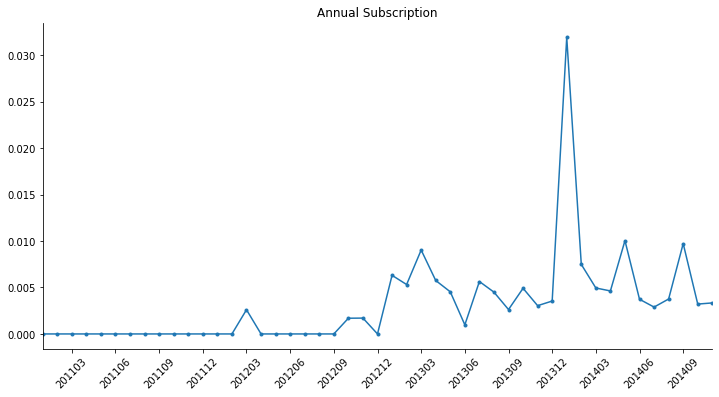

In [110]:
arange = __import__("numpy").arange
ax = churn_by_year.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()
ax.set_title("Annual Subscription")

It seems the spike in churn originates from the monthly plans in December and from the annual plans in January. Your intuition was correct!

Looking at the annual graph you immediately remember that when you took over the business in January of 2013, you made a promo where people could sign up for a year for $500. What you're seeing here is the churn due to that promotion. Maybe people don't want to pay $50 per month, or maybe they had already quit a few months prior.

A few actions that you could take to reactivate these customers are:

Make a new promotion specifically for the quitters.
Make a new promotion specifically for the customers who attended the gym up until the end.
Throw in some perks in addition to the standard service for the customers who didn't quit.
As for the monthly plan churned customers, you think back to recent changes in the service to try to figure out why they quit. Nothing comes to mind, you have no idea.

You decide to reach out to these customers and offer them a one-day pass for the gym in exchange for their feedback. Hopefully you can get some insights and act on them.

Overall, you've been doing a good job of keeping your customers. In addition to being a fit creative genius, you also are an entrepreneur — life isn't fair.